In [119]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/student-alcohol-consumption")

print("Path to dataset files:", path)

Path to dataset files: /Users/jeongho/.cache/kagglehub/datasets/uciml/student-alcohol-consumption/versions/2


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split


df = pd.read_csv(os.path.join(path, "student-mat.csv"))

In [121]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

<Axes: >

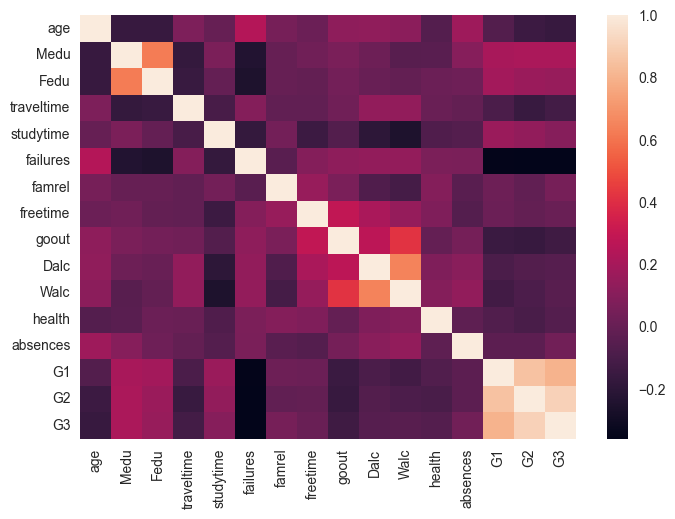

In [123]:
corr = df.select_dtypes(np.number).corr()

sns.heatmap(corr)

In [124]:
np.sum(df.isnull())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [125]:
abs(corr["G3"].sort_values(ascending=False))

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc          0.051939
Dalc          0.054660
health        0.061335
traveltime    0.117142
goout         0.132791
age           0.161579
failures      0.360415
Name: G3, dtype: float64

In [126]:
cor_cols = corr[abs(corr["G3"]) > 0.2].columns

cor_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [127]:
df2 = df[cor_cols]
df2

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [128]:
from pycaret.regression import *

setup(df2, target=df2["G3"], train_size=0.7, session_id=42)

,Description,Value
0,Session id,42
1,Target,G3_y
2,Target type,Regression
3,Original data shape,"(395, 17)"
4,Transformed data shape,"(395, 17)"
5,Transformed train set shape,"(276, 17)"
6,Transformed test set shape,"(119, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [129]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0005,0.0000,0.0030
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0005,0.0000,0.0030
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0005,0.0000,0.0030
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0005,0.0000,0.0030
huber,Huber Regressor,0.0001,0.0000,0.0001,1.0000,0.0005,0.0000,0.0060
ridge,Ridge Regression,0.0015,0.0000,0.0024,1.0000,0.0019,0.0001,0.0030
par,Passive Aggressive Regressor,0.0487,0.0037,0.0602,0.9998,0.0194,0.0044,0.0030
gbr,Gradient Boosting Regressor,0.0155,0.0140,0.0660,0.9994,0.0101,0.0027,0.0140
et,Extra Trees Regressor,0.0417,0.0137,0.1007,0.9994,0.0199,0.0044,0.0140
rf,Random Forest Regressor,0.0469,0.0541,0.1560,0.9978,0.0219,0.0070,0.0160


LinearRegression(n_jobs=-1)

In [130]:
df2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [131]:
df2

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [132]:
X = df2.drop(["G3"], axis=1)
y = df2["G3"]

In [133]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, train_size=0.7, shuffle=True
)

In [135]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8049063890373246

In [136]:
nonnumeric_df = df.select_dtypes("object")


for col in nonnumeric_df.columns:
    print(f"{col}", df[col].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


In [137]:
binary_col = list()
col_list = list()

for col in nonnumeric_df.columns:
    if len(nonnumeric_df[col].unique()) == 2:
        binary_col.append(col)
    else:
        col_list.append(col)


print(binary_col)
print(col_list)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
['Mjob', 'Fjob', 'reason', 'guardian']


In [138]:
df["Mjob"] = df["Mjob"].apply(lambda x: "m_" + x)
df["Fjob"] = df["Fjob"].apply(lambda x: "f_" + x)
df["reason"] = df["reason"].apply(lambda x: "r_" + x)
df["guardian"] = df["guardian"].apply(lambda x: "g_" + x)

In [139]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,m_at_home,f_teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,m_at_home,f_other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,m_at_home,f_other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,m_health,f_services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,m_other,f_other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,m_services,f_services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,m_services,f_services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,m_other,f_other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,m_services,f_other,...,4,4,1,3,4,5,0,11,12,10


In [140]:
dummies = pd.concat(
    [
        pd.get_dummies(df["Mjob"], dtype=int),
        pd.get_dummies(df["Fjob"], dtype=int),
        pd.get_dummies(df["reason"], dtype=int),
        pd.get_dummies(df["guardian"], dtype=int),
    ],
    axis=1,
)

In [141]:
df3 = pd.concat([df2, dummies], axis=1)
df3

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,18,4,4,2,2,0,4,3,4,1,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,0,0,0,0,0,1
391,17,3,1,2,1,0,2,4,5,3,...,0,1,0,1,0,0,0,0,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,0,1,0,0,0,0,0,1
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,1,0,0,0,0,1,0


In [142]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   m_at_home     395 non-null    int64
 1   m_health      395 non-null    int64
 2   m_other       395 non-null    int64
 3   m_services    395 non-null    int64
 4   m_teacher     395 non-null    int64
 5   f_at_home     395 non-null    int64
 6   f_health      395 non-null    int64
 7   f_other       395 non-null    int64
 8   f_services    395 non-null    int64
 9   f_teacher     395 non-null    int64
 10  r_course      395 non-null    int64
 11  r_home        395 non-null    int64
 12  r_other       395 non-null    int64
 13  r_reputation  395 non-null    int64
 14  g_father      395 non-null    int64
 15  g_mother      395 non-null    int64
 16  g_other       395 non-null    int64
dtypes: int64(17)
memory usage: 52.6 KB


In [143]:
encoder = LabelEncoder()

binary_df = df[binary_col]

binary_df

mappings = list()

for col in binary_df.columns:
    binary_df[col] = encoder.fit_transform(binary_df[col])
    mapping_dicts = {label: index for index, label in enumerate(encoder.classes_)}
    mappings.append(mapping_dicts)

In [144]:
mappings

[{'GP': 0, 'MS': 1},
 {'F': 0, 'M': 1},
 {'R': 0, 'U': 1},
 {'GT3': 0, 'LE3': 1},
 {'A': 0, 'T': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1}]

In [145]:
df4 = pd.concat([df3, binary_df], axis=1)

In [146]:
df4

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,18,4,4,2,2,0,4,3,4,1,...,0,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,1,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,1,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,1,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,1,0,0,0,0,0,1,1,0


In [147]:
setup(df4, target=df4["G3"], train_size=0.7, session_id=42)

,Description,Value
0,Session id,42
1,Target,G3_y
2,Target type,Regression
3,Original data shape,"(395, 47)"
4,Transformed data shape,"(395, 47)"
5,Transformed train set shape,"(276, 47)"
6,Transformed test set shape,"(119, 47)"
7,Numeric features,46
8,Preprocess,True
9,Imputation type,simple


In [148]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0005,0.0000,0.0030
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0005,0.0000,0.0040
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0005,0.0000,0.0040
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0005,0.0000,0.0110
huber,Huber Regressor,0.0017,0.0000,0.0020,1.0000,0.0009,0.0001,0.0060
ridge,Ridge Regression,0.0020,0.0000,0.0028,1.0000,0.0021,0.0002,0.0050
par,Passive Aggressive Regressor,0.0558,0.0048,0.0686,0.9997,0.0250,0.0050,0.0040
gbr,Gradient Boosting Regressor,0.0172,0.0134,0.0663,0.9994,0.0091,0.0027,0.0120
et,Extra Trees Regressor,0.0468,0.0202,0.1040,0.9993,0.0144,0.0045,0.0190
rf,Random Forest Regressor,0.0483,0.0543,0.1584,0.9979,0.0213,0.0070,0.0190


LinearRegression(n_jobs=-1)

In [149]:
X = df3.drop(["G3"], axis=1)
y = df3["G3"]

In [150]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, train_size=0.7, shuffle=True
)

In [152]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [153]:
model.score(X_test, y_test)

0.7819299689776101